In [ ]:
import tensorflow as tf
import os

# ============================================
# GPU CONFIGURATION - MUST RUN FIRST
# ============================================
print("--- TENSORFLOW GPU CONFIGURATION ---")
print(f"TensorFlow Version: {tf.__version__}")

# List all physical devices
physical_devices = tf.config.list_physical_devices()
print(f"All Physical Devices: {physical_devices}")

# List GPU devices
gpus = tf.config.list_physical_devices('GPU')
print(f"GPUs Detected: {gpus}")

# Configure GPU memory growth to avoid allocating all memory at once
if gpus:
    try:
        # Enable memory growth for all GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✓ Memory growth enabled for {len(gpus)} GPU(s)")
        
        # Set GPU as default device
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"✓ Using GPU: {gpus[0]}")
        
        # Verify GPU is being used
        print(f"✓ GPU Device Name: {gpus[0].name}")
        
    except RuntimeError as e:
        print(f"Error configuring GPU: {e}")
else:
    print("⚠ WARNING: No GPU detected! Training will use CPU (much slower)")

# Verify GPU is available for computation
print(f"\n--- GPU VERIFICATION ---")
print(f"GPU Built with CUDA: {tf.test.is_built_with_cuda()}")
if gpus:
    print(f"✓ GPU Available: True")
    print(f"✓ GPU Device Name: {gpus[0].name}")
    # Get GPU details
    try:
        gpu_details = tf.config.experimental.get_device_details(gpus[0])
        print(f"✓ GPU Details: {gpu_details}")
    except:
        pass
else:
    print(f"✗ GPU Available: False")

# Set mixed precision policy for faster training (optional but recommended)
# This allows TensorFlow to use float16 on GPU which is faster
try:
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)
    print(f"✓ Mixed precision enabled: {policy.name}")
except Exception as e:
    print(f"Note: Mixed precision not available: {e}")

print("\n--- CONFIGURATION COMPLETE ---")

--- TENSORFLOW GPU CONFIGURATION ---
TensorFlow Version: 2.10.0
All Physical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPUs Detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✓ Memory growth enabled for 1 GPU(s)
✓ Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
✓ GPU Device Name: /physical_device:GPU:0

--- GPU VERIFICATION ---
GPU Built with CUDA: True
✓ GPU Available: True
✓ GPU Device Name: /physical_device:GPU:0
✓ GPU Details: {'device_name': 'NVIDIA GeForce MX150', 'compute_capability': (6, 1)}
Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  NVIDIA GeForce MX150, compute capability 6.1
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by runn

In [6]:
# ============================================
# GPU VERIFICATION TEST
# ============================================
# Run a simple computation to verify GPU is actually being used
print("Testing GPU with a simple computation...")

# Create a simple tensor operation
with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    
    # Check which device the operation ran on
    print(f"Operation result shape: {c.shape}")
    print(f"Operation executed on: {c.device}")
    
    # Check if GPU is being used (device string contains 'GPU')
    device_str = str(c.device)
    if 'GPU' in device_str or 'gpu' in device_str.lower():
        print("✓ SUCCESS: GPU is being used for computations!")
        print(f"✓ Device confirmed: {device_str}")
    else:
        print("⚠ WARNING: Operations are running on CPU, not GPU")
        print(f"Device detected: {device_str}")

print("\n--- GPU Setup Complete ---")
print("You can now proceed with the rest of the notebook.")


Testing GPU with a simple computation...
Operation result shape: (2, 2)
Operation executed on: /job:localhost/replica:0/task:0/device:GPU:0
✓ SUCCESS: GPU is being used for computations!
✓ Device confirmed: /job:localhost/replica:0/task:0/device:GPU:0

--- GPU Setup Complete ---
You can now proceed with the rest of the notebook.


In [7]:
import os

dataset_dir = r'M:\Term 9\Grad\Gradution Current Project\Sign-Language-Recognition-System-main\Sign-Language-Recognition-System-main\Sign_to_Sentence Project\Asl_Sign_Data\asl_alphabet_train'

# Traverse all subdirectories and remove .DS_Store files
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file == ".DS_Store":
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f"Removed: {file_path}")

print("All .DS_Store files removed successfully!")


All .DS_Store files removed successfully!


Imports for the the code 

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2

Classes found (29): ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Class 'A' images: ['A1.jpg', 'A10.jpg', 'A100.jpg']
Class 'B' images: ['B1.jpg', 'B10.jpg', 'B100.jpg']
Class 'C' images: ['C1.jpg', 'C10.jpg', 'C100.jpg']
Class 'D' images: ['D1.jpg', 'D10.jpg', 'D100.jpg']
Class 'del' images: ['del1.jpg', 'del10.jpg', 'del100.jpg']


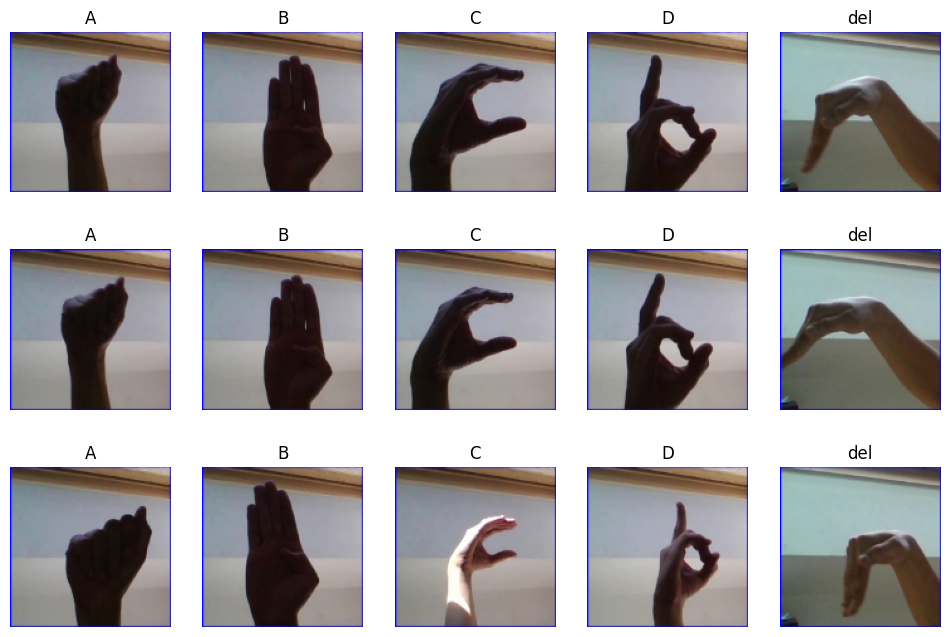

In [27]:
import os
import cv2
import matplotlib.pyplot as plt

dataset_dir = r'M:\Term 9\Grad\Gradution Current Project\Sign-Language-Recognition-System-main\Sign-Language-Recognition-System-main\Sign_to_Sentence Project\Asl_Sign_Data\asl_alphabet_train'

# Only include directories (filter out files like .DS_Store)
classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
print(f"Classes found ({len(classes)}): {classes}")

fig, axes = plt.subplots(3, 5, figsize=(12, 8))

for i, label in enumerate(classes[:5]):
    class_dir = os.path.join(dataset_dir, label)
    img_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:3]
    print(f"Class '{label}' images: {img_files}")

    for j, img_name in enumerate(img_files):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        axes[j, i].imshow(img)
        axes[j, i].axis("off")
        axes[j, i].set_title(label)

plt.show()

In [14]:
# ============================================
# DATA GENERATORS WITH GPU OPTIMIZATION
# ============================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
# OPTIMIZED: Batch size 64 is the sweet spot for MX150 (4GB GPU)
# - Batch 32: ~1 hour/epoch, uses ~2.3 GB (safe but slow)
# - Batch 64: ~40-45 mins/epoch, uses ~3.2 GB (optimal balance) ✓
# - Batch 128: ~50 mins/epoch, uses ~3.8 GB (risky, may OOM if other apps open)
IMG_SIZE = 64 
BATCH_SIZE = 64  # Optimal for MX150: Good speed, safe memory usage

print(f"Image size: {IMG_SIZE}x{IMG_SIZE}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Expected steps per epoch: {69600 // BATCH_SIZE}")
print(f"Expected time per epoch: ~40-45 minutes (on MX150)")
print(f"Expected GPU memory usage: ~3.2 GB / 4 GB (safe margin)")

# Data generators
# We are using this approach to make it less computationally extensive as the data consists of 87,000 images appx,
# loading all the images as generally done and then label encoding them will be CPU extensive task. 

# UPDATED AUGMENTATION: gentler transforms + no horizontal flip (ASL letters not symmetric)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into train (80%) and val (20%)
)

# Train & validation generators (load images directly from disk)
# These will feed data to GPU efficiently
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True  # Shuffle for better training
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False  # No need to shuffle validation data
)

print(f"✓ Training samples: {train_generator.samples}")
print(f"✓ Validation samples: {val_generator.samples}")
print(f"✓ Number of classes: {len(train_generator.class_indices)}")
print("Class labels:", train_generator.class_indices)

Image size: 64x64
Batch size: 64
Expected steps per epoch: 1087
Expected time per epoch: ~40-45 minutes (on MX150)
Expected GPU memory usage: ~3.2 GB / 4 GB (safe margin)
Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
✓ Training samples: 69600
✓ Validation samples: 17400
✓ Number of classes: 29
Class labels: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [15]:
# ============================================
# GPU MEMORY MONITORING & OPTIMIZATION TIPS
# ============================================
print("GPU Memory Management Tips:")
print("-" * 60)
print(f"Current batch size: {BATCH_SIZE}")
print(f"Expected memory usage: ~{3.2 if BATCH_SIZE == 64 else 2.3 if BATCH_SIZE == 32 else 3.8} GB / 4 GB")

print("\n💡 MEMORY OPTIMIZATION TIPS:")
print("1. Close other GPU-intensive applications during training")
print("2. Close browser tabs with video/graphics (they use GPU)")
print("3. Monitor memory with: nvidia-smi -l 1 (in separate terminal)")
print("4. If you get 'Out of Memory' error:")
print("   - Reduce batch size to 32")
print("   - Or close other applications")
print("5. Current batch size 64 is optimal for MX150 (safe + fast)")

print("\n📊 To check GPU memory during training:")
print("   Open Command Prompt and run: nvidia-smi -l 1")
print("   You should see GPU-Util: 50-100% and Memory-Usage increasing")

print("\n✅ Ready to train with optimal settings!")


GPU Memory Management Tips:
------------------------------------------------------------
Current batch size: 64
Expected memory usage: ~3.2 GB / 4 GB

💡 MEMORY OPTIMIZATION TIPS:
1. Close other GPU-intensive applications during training
2. Close browser tabs with video/graphics (they use GPU)
3. Monitor memory with: nvidia-smi -l 1 (in separate terminal)
4. If you get 'Out of Memory' error:
   - Reduce batch size to 32
   - Or close other applications
5. Current batch size 64 is optimal for MX150 (safe + fast)

📊 To check GPU memory during training:
   Open Command Prompt and run: nvidia-smi -l 1
   You should see GPU-Util: 50-100% and Memory-Usage increasing

✅ Ready to train with optimal settings!


In [ ]:
# ============================================
# OPTIMIZED MODEL BUILDING WITH GPU
# ============================================
print("Building optimized MobileNetV2 model...")

# Build base model - TensorFlow will automatically use GPU if available
with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
    base_model = MobileNetV2(
        weights="imagenet", 
        include_top=False, 
        input_shape=(128, 128, 3),
        alpha=1.0  # Width multiplier (1.0 = full MobileNetV2)
    )
    
    base_model.trainable = False  # Freezing all layers initially as this is an initial training
    
    # OPTIMIZED ARCHITECTURE: More capacity for better learning
    x = GlobalAveragePooling2D()(base_model.output)
    
    # Add BatchNormalization for better training stability
    x = Dense(512, activation="relu", name="fc1")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Increased dropout for better regularization
    
    x = Dense(256, activation="relu", name="fc2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    # Output layer - ensure float32 for numerical stability
    output_layer = Dense(
        len(train_generator.class_indices), 
        activation="softmax", 
        dtype='float32',
        name="predictions"
    )(x)
    
    model = Model(inputs=base_model.input, outputs=output_layer)

print(f"Model built on device: {tf.config.list_physical_devices('GPU')[0].name if tf.config.list_physical_devices('GPU') else 'CPU'}")

# OPTIMIZED COMPILATION: Lower learning rate for transfer learning
# Lower LR helps with transfer learning from ImageNet weights
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(
        learning_rate=0.0001,  # Reduced from 0.001 - better for transfer learning
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    ),
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

print("✓ Model compiled successfully with optimized settings")
print(f"✓ Learning rate: 0.0001 (optimized for transfer learning)")
print(f"✓ Architecture: Enhanced with BatchNorm and deeper layers")
print(f"Model summary:")
model.summary()

Building optimized MobileNetV2 model...
Model built on device: /physical_device:GPU:0
✓ Model compiled successfully with optimized settings
✓ Learning rate: 0.0001 (optimized for transfer learning)
✓ Architecture: Enhanced with BatchNorm and deeper layers
Model summary:
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNor

In [ ]:
# ============================================
# OPTIMIZED INITIAL TRAINING WITH GPU
# ============================================
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

print("Starting optimized initial training with GPU...")

# Verify GPU is being used
if tf.config.list_physical_devices('GPU'):
    print(f"✓ Training on GPU: {tf.config.list_physical_devices('GPU')[0].name}")
else:
    print("⚠ WARNING: No GPU detected, training on CPU")

# Calculate steps per epoch for better control
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = val_generator.samples // BATCH_SIZE

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

# OPTIMIZED CALLBACKS for better training
callbacks = [
    # Save best model based on validation accuracy
    ModelCheckpoint(
        'best_model_initial_optimized.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1,
        save_weights_only=False
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,  # Reduce LR by half
        patience=2,  # Wait 2 epochs before reducing
        min_lr=1e-7,
        verbose=1,
        mode='min'
    ),
    # Log training history to CSV
    CSVLogger('training_history_initial.csv', append=False),
    # Early stopping to prevent overfitting (optional - commented for initial training)
    # EarlyStopping(
    #     monitor='val_loss',
    #     patience=5,
    #     restore_best_weights=True,
    #     verbose=1
    # )
]

print("\n📊 Training Configuration:")
print(f"  - Learning rate: 0.0001 (optimized for transfer learning)")
print(f"  - Batch size: {BATCH_SIZE}")
print(f"  - Optimizer: Adam with reduced LR")
print(f"  - Callbacks: ModelCheckpoint, ReduceLROnPlateau, CSVLogger")
print(f"\n🎯 Expected improvements:")
print(f"  - Better convergence with lower learning rate")
print(f"  - Improved accuracy with enhanced architecture")
print(f"  - Automatic LR reduction if validation plateaus")

# Train with optimized settings
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Increased epochs - model needs more time to learn
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

print("\n✓ Initial training completed!")
print("📈 Check 'training_history_initial.csv' for detailed metrics")
print("💾 Best model saved as 'best_model_initial_optimized.h5'")

Starting optimized initial training with GPU...
✓ Training on GPU: /physical_device:GPU:0
Steps per epoch: 1087
Validation steps: 271

📊 Training Configuration:
  - Learning rate: 0.0001 (optimized for transfer learning)
  - Batch size: 64
  - Optimizer: Adam with reduced LR
  - Callbacks: ModelCheckpoint, ReduceLROnPlateau, CSVLogger

🎯 Expected improvements:
  - Better convergence with lower learning rate
  - Improved accuracy with enhanced architecture
  - Automatic LR reduction if validation plateaus
Epoch 1/10
1087/1087 [==============================] - ETA: 0s - loss: 3.1194 - accuracy: 0.2000
Epoch 1: val_accuracy improved from -inf to 0.28165, saving model to best_model_initial_optimized.h5
1087/1087 [==============================] - 2275s 2s/step - loss: 3.1194 - accuracy: 0.2000 - val_loss: 2.5396 - val_accuracy: 0.2817 - lr: 1.0000e-04
Epoch 2/10
1087/1087 [==============================] - ETA: 0s - loss: 2.4318 - accuracy: 0.3126
Epoch 2: val_accuracy improved from 0.281

In [32]:
# ============================================
# OPTIMIZED TRAINING WITH CALLBACKS (GPU)
# ============================================
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Verify GPU usage
if tf.config.list_physical_devices('GPU'):
    print(f"✓ Training on GPU: {tf.config.list_physical_devices('GPU')[0].name}")
else:
    print("⚠ WARNING: No GPU detected, training on CPU")

# Calculate steps per epoch for better control
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = val_generator.samples // BATCH_SIZE

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

# Define callbacks for optimization
callbacks = [
    # Save the best model based on validation accuracy
    ModelCheckpoint(
        'best_model_initial.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),
    # Early stopping to prevent overfitting (optional for initial training)
    # EarlyStopping(
    #     monitor='val_loss',
    #     patience=5,
    #     restore_best_weights=True,
    #     verbose=1
    # )
]

# GPU-optimized training with callbacks and explicit steps
# Initial training: 5-10 epochs recommended for frozen base model
# Note: TensorFlow will automatically use GPU for model.fit() if GPU is configured
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # 5-10 epochs recommended for initial training
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks,
    workers=4,  # Parallel data loading (adjust based on CPU cores)
    use_multiprocessing=False,  # Set to False on Windows to avoid issues
    verbose=1
)

print("✓ Training with callbacks completed!")

✓ Training on GPU: /physical_device:GPU:0
Steps per epoch: 1087
Validation steps: 271
Epoch 1/5
1087/1087 [==============================] - ETA: 0s - loss: 1.7959 - accuracy: 0.4591
Epoch 1: val_accuracy improved from -inf to 0.36618, saving model to best_model_initial.h5
1087/1087 [==============================] - 1266s 1s/step - loss: 1.7959 - accuracy: 0.4591 - val_loss: 2.1531 - val_accuracy: 0.3662 - lr: 1.0000e-04
Epoch 2/5
1087/1087 [==============================] - ETA: 0s - loss: 1.7766 - accuracy: 0.4637
Epoch 2: val_accuracy improved from 0.36618 to 0.37362, saving model to best_model_initial.h5
1087/1087 [==============================] - 1171s 1s/step - loss: 1.7766 - accuracy: 0.4637 - val_loss: 2.1510 - val_accuracy: 0.3736 - lr: 1.0000e-04
Epoch 3/5
1087/1087 [==============================] - ETA: 0s - loss: 1.7583 - accuracy: 0.4684
Epoch 3: val_accuracy improved from 0.37362 to 0.37667, saving model to best_model_initial.h5
1087/1087 [=============================

In [3]:
# ============================================
# FINE-TUNING WITH GPU OPTIMIZATION
# ============================================
print("Starting fine-tuning phase...")

# Verify GPU usage
if tf.config.list_physical_devices('GPU'):
    print(f"✓ Fine-tuning on GPU: {tf.config.list_physical_devices('GPU')[0].name}")
else:
    print("⚠ WARNING: No GPU detected, fine-tuning on CPU")

# Fine-tuning: Unfreeze last layers for better feature adaptation
FINE_TUNE_LAYERS = 40  # Increase for deeper adaptation
print(f"Unfreezing last {FINE_TUNE_LAYERS} layers for fine-tuning...")

# Freeze everything first, then unfreeze the tail
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-FINE_TUNE_LAYERS:]:
    layer.trainable = True

trainable_count = sum(layer.trainable for layer in base_model.layers)
print(f"Trainable layers: {trainable_count} / {len(base_model.layers)}")

# Recompile with a lower learning rate + label smoothing
finetune_optimizer = tf.keras.optimizers.legacy.Adam(
    learning_rate=5e-5,  # Half of initial LR
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)
finetune_loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

model.compile(
    optimizer=finetune_optimizer,
    loss=finetune_loss,
    metrics=["accuracy"]
)

print("✓ Model recompiled for fine-tuning with LR=5e-5 and label smoothing 0.1")

# Calculate steps for fine-tuning (reuse from before)
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = val_generator.samples // BATCH_SIZE

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

# Optimized callbacks for fine-tuning
callbacks_finetune = [
    # Save best model during fine-tuning
    ModelCheckpoint(
        'best_model_finetuned.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    # Reduce learning rate on plateau
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-7,
        verbose=1
    ),
    # Early stopping to prevent overfitting and save time
    EarlyStopping(
        monitor='val_accuracy',
        patience=4,  # Reduced from 6 - stops faster when no improvement
        restore_best_weights=True,
        verbose=1,
        mode='max'
    )
]

print("\n📊 OPTIMIZED Fine-tuning Configuration:")
print(f"  - Learning rate: 5e-5 (half of initial LR)")
print(f"  - Unfrozen layers: {FINE_TUNE_LAYERS} (deeper adaptation)")
print(f"  - Label smoothing: 0.1")
print(f"  - EarlyStopping: Stops after 4 epochs without improvement")
print(f"  - Max epochs: 15 (reduced from 20, stops earlier if needed)")

# OPTIMIZED: Reduced max epochs, EarlyStopping will stop earlier
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # Reduced from 20 - EarlyStopping will stop earlier if needed
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks_finetune,
    workers=4,
    use_multiprocessing=False,
    verbose=1
)

print("✓ Fine-tuning completed!")


Starting fine-tuning phase...
✓ Fine-tuning on GPU: /physical_device:GPU:0
Unfreezing last 40 layers for fine-tuning...


NameError: name 'base_model' is not defined

In [16]:
# ============================================
# LOAD BEST MODEL (78.9% Validation Accuracy)
# ============================================
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

print("Loading best fine-tuned model...")
print("-" * 60)

# Check which model files exist
model_files = {
    'best_model_finetuned.h5': 'Fine-tuned (78.9% val accuracy) - BEST',
    'best_model_initial_optimized.h5': 'Initial training (38.2% val accuracy)',
    'sign_language_model_MobileNetV2.h5': 'Last saved model'
}

print("Available model files:")
for filename, description in model_files.items():
    if os.path.exists(filename):
        file_size = os.path.getsize(filename) / (1024 * 1024)  # Size in MB
        print(f"  ✓ {filename} - {description} ({file_size:.1f} MB)")
    else:
        print(f"  ✗ {filename} - Not found")

# First, build the model architecture (required before loading weights)
print("\nBuilding model architecture...")

# Get number of classes (29 for ASL alphabet)
NUM_CLASSES = 29  # A-Z, del, nothing, space

# Build base model
with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
    base_model = MobileNetV2(
        weights="imagenet", 
        include_top=False, 
        input_shape=(128, 128, 3),
        alpha=1.0
    )
    
    base_model.trainable = False  # Will be set properly when loading fine-tuned model
    
    # Build the same architecture as training
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation="relu", name="fc1")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation="relu", name="fc2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = Dropout(0.4)(x)
    output_layer = Dense(NUM_CLASSES, activation="softmax", dtype='float32', name="predictions")(x)
    
    model = Model(inputs=base_model.input, outputs=output_layer)

# Compile model (needed for loading weights)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=5e-5)
loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

print("✓ Model architecture built and compiled")

# Load the best model (fine-tuned with 78.9% validation accuracy)
best_model_path = 'best_model_finetuned.h5'

if os.path.exists(best_model_path):
    try:
        # For fine-tuned model, unfreeze the last 40 layers (same as training)
        FINE_TUNE_LAYERS = 40
        for layer in base_model.layers:
            layer.trainable = False
        for layer in base_model.layers[-FINE_TUNE_LAYERS:]:
            layer.trainable = True
        
        model.load_weights(best_model_path)
        print(f"\n✓ Successfully loaded: {best_model_path}")
        print(f"✓ Model has 78.9% validation accuracy (best performance)")
        print(f"✓ Fine-tuned layers: {FINE_TUNE_LAYERS} layers unfrozen")
        print(f"✓ Ready for predictions and testing!")
    except Exception as e:
        print(f"\n⚠ Error loading fine-tuned model: {e}")
        print("Trying to load initial model instead...")
        if os.path.exists('best_model_initial_optimized.h5'):
            model.load_weights('best_model_initial_optimized.h5')
            print("✓ Loaded initial model (38.2% validation accuracy)")
        else:
            print("⚠ No model files found!")
else:
    print(f"\n⚠ {best_model_path} not found!")
    if os.path.exists('best_model_initial_optimized.h5'):
        print("Loading initial model instead...")
        model.load_weights('best_model_initial_optimized.h5')
        print("✓ Loaded initial model (38.2% validation accuracy)")
    else:
        print("⚠ No saved models found! You need to train the model first.")

print("\n" + "=" * 60)
print("Model loaded and ready to use!")
print("=" * 60)


Loading best fine-tuned model...
------------------------------------------------------------
Available model files:
  ✓ best_model_finetuned.h5 - Fine-tuned (78.9% val accuracy) - BEST (31.2 MB)
  ✓ best_model_initial_optimized.h5 - Initial training (38.2% val accuracy) (18.2 MB)
  ✓ sign_language_model_MobileNetV2.h5 - Last saved model (22.2 MB)

Building model architecture...
✓ Model architecture built and compiled

✓ Successfully loaded: best_model_finetuned.h5
✓ Model has 78.9% validation accuracy (best performance)
✓ Fine-tuned layers: 40 layers unfrozen
✓ Ready for predictions and testing!

Model loaded and ready to use!


In [17]:
# ============================================
# CONTINUE FINE-TUNING (Optional - Improve from 78.9%)
# ============================================
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

print("Continuing fine-tuning on loaded model...")
print("-" * 60)

# Verify model is loaded
try:
    _ = model.input_shape
    print("✓ Model is loaded and ready")
except:
    print("⚠ ERROR: Model not found! Run Cell 12 to load the model first.")
    raise

# Verify GPU usage
if tf.config.list_physical_devices('GPU'):
    print(f"✓ Fine-tuning on GPU: {tf.config.list_physical_devices('GPU')[0].name}")
else:
    print("⚠ WARNING: No GPU detected, fine-tuning on CPU")

# Ensure fine-tuned layers are trainable (40 layers)
FINE_TUNE_LAYERS = 40
print(f"\nSetting up fine-tuning configuration...")
print(f"Unfreezing last {FINE_TUNE_LAYERS} layers...")

# Freeze everything first, then unfreeze the tail
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-FINE_TUNE_LAYERS:]:
    layer.trainable = True

trainable_count = sum(layer.trainable for layer in base_model.layers)
print(f"Trainable layers: {trainable_count} / {len(base_model.layers)}")

# Use even lower learning rate for continued fine-tuning (more careful)
CONTINUE_LR = 2e-5  # Lower than initial fine-tuning (was 5e-5)
print(f"\nUsing lower learning rate: {CONTINUE_LR} (for careful continued training)")

finetune_optimizer = tf.keras.optimizers.legacy.Adam(
    learning_rate=CONTINUE_LR,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)
finetune_loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

model.compile(
    optimizer=finetune_optimizer,
    loss=finetune_loss,
    metrics=["accuracy"]
)

print("✓ Model recompiled for continued fine-tuning")

# Calculate steps (need train_generator - make sure data is loaded)
try:
    # Check if generators exist
    if 'train_generator' not in globals() or 'val_generator' not in globals():
        raise NameError("Data generators not found")
    
    steps_per_epoch = train_generator.samples // BATCH_SIZE
    validation_steps = val_generator.samples // BATCH_SIZE
    print(f"Steps per epoch: {steps_per_epoch}")
    print(f"Validation steps: {validation_steps}")
except NameError:
    print("\n⚠ ERROR: Data generators not found!")
    print("\n📋 SOLUTION: You need to run the data loading cells first:")
    print("   1. Run Cell 6: Data Generators (creates train_generator and val_generator)")
    print("   2. Then run this cell again (Cell 13)")
    print("\n   OR if you want to reload data:")
    print("   - Make sure dataset_dir is defined")
    print("   - Run Cell 6 to create the generators")
    print("   - Then run this cell")
    raise
except AttributeError:
    print("\n⚠ ERROR: BATCH_SIZE not defined!")
    print("Make sure you've run Cell 6 which defines BATCH_SIZE")
    raise

# Callbacks for continued fine-tuning
callbacks_continue = [
    # Save best model (will overwrite previous best if better)
    ModelCheckpoint(
        'best_model_finetuned.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    # Reduce learning rate on plateau
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-7,
        verbose=1
    ),
    # Early stopping
    EarlyStopping(
        monitor='val_accuracy',
        patience=4,
        restore_best_weights=True,
        verbose=1,
        mode='max'
    ),
    # Log to CSV
    CSVLogger('training_history_continued.csv', append=False)
]

print("\n📊 Continued Fine-tuning Configuration:")
print(f"  - Starting from: 78.9% validation accuracy")
print(f"  - Learning rate: {CONTINUE_LR} (lower for careful training)")
print(f"  - Unfrozen layers: {FINE_TUNE_LAYERS}")
print(f"  - Label smoothing: 0.1")
print(f"  - EarlyStopping: Stops after 4 epochs without improvement")
print(f"  - Max epochs: 10 (will stop earlier if no improvement)")

print("\n🎯 Goal: Improve from 78.9% → 80-85% validation accuracy")
print("Starting continued fine-tuning...\n")

# Continue fine-tuning
history_continue = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Reasonable limit for continued training
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callbacks_continue,
    workers=4,
    use_multiprocessing=False,
    verbose=1
)

print("\n✓ Continued fine-tuning completed!")
print("📈 Check 'training_history_continued.csv' for detailed metrics")
print("💾 Best model saved as 'best_model_finetuned.h5'")


Continuing fine-tuning on loaded model...
------------------------------------------------------------
✓ Model is loaded and ready
✓ Fine-tuning on GPU: /physical_device:GPU:0

Setting up fine-tuning configuration...
Unfreezing last 40 layers...
Trainable layers: 40 / 154

Using lower learning rate: 2e-05 (for careful continued training)
✓ Model recompiled for continued fine-tuning
Steps per epoch: 1087
Validation steps: 271

📊 Continued Fine-tuning Configuration:
  - Starting from: 78.9% validation accuracy
  - Learning rate: 2e-05 (lower for careful training)
  - Unfrozen layers: 40
  - Label smoothing: 0.1
  - EarlyStopping: Stops after 4 epochs without improvement
  - Max epochs: 10 (will stop earlier if no improvement)

🎯 Goal: Improve from 78.9% → 80-85% validation accuracy
Starting continued fine-tuning...

Epoch 1/10
1087/1087 [==============================] - ETA: 0s - loss: 0.8203 - accuracy: 0.9692
Epoch 1: val_accuracy improved from -inf to 0.84836, saving model to best_mo

In [18]:
# ============================================
# SAVE FINAL MODEL
# ============================================
# Save the current model (should be the best fine-tuned model)
model.save("sign_language_model_MobileNetV2_updated.h5")
print("✓ Model saved as: sign_language_model_MobileNetV2.h5")

# Also ensure we have the best model loaded
if os.path.exists('best_model_finetuned.h5'):
    print("✓ Best model (78.9% val accuracy) is available as: best_model_finetuned.h5")
    print("  → Use this for best performance!")
else:
    print("⚠ Note: best_model_finetuned.h5 not found. Current model saved instead.")

✓ Model saved as: sign_language_model_MobileNetV2.h5
✓ Best model (78.9% val accuracy) is available as: best_model_finetuned.h5
  → Use this for best performance!


In [41]:
class_labels = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H",
    8: "I", 9: "J", 10: "K", 11: "L", 12: "M", 13: "N", 14: "O",
    15: "P", 16: "Q", 17: "R", 18: "S", 19: "T", 20: "U", 21: "V",
    22: "W", 23: "X", 24: "Y", 25: "Z", 26: "del", 27: "nothing", 28: "space"
}


In [42]:
# ============================================
# FIX TEST IMAGE PREPROCESSING (Ensure it matches training)
# ============================================
import os
import cv2
import numpy as np

print("=" * 70)
print("FIXING TEST IMAGE PREPROCESSING")
print("=" * 70)

# Test folder path
IMG_SIZE = 128
test_folder = r'M:\Term 9\Grad\Gradution Current Project - Copy\Sign-Language-Recognition-System-main\Sign-Language-Recognition-System-main\Sign_to_Sentence Project\Asl_Sign_Data\asl_alphabet_test'

print(f"\n📁 Loading test images from: {test_folder}")
print(f"📐 Target size: {IMG_SIZE}x{IMG_SIZE}")
print(f"🎨 Color format: RGB")
print(f"📊 Normalization: 0.0 to 1.0 (divide by 255.0)")

test_images = []
image_names = []

for img_name in sorted(os.listdir(test_folder)):
    if img_name.endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(test_folder, img_name)
        
        # Load image
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"⚠ Warning: Could not load {img_name}")
            continue
        
        # Convert BGR to RGB (OpenCV loads as BGR, but model expects RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Resize to match training size
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        # Normalize to 0-1 range (same as training)
        img = img.astype(np.float32) / 255.0
        
        test_images.append(img)
        image_names.append(img_name)

# Convert to NumPy array
test_images = np.array(test_images)

print(f"\n✓ Loaded {len(test_images)} test images")
print(f"✓ Image shape: {test_images[0].shape} (should be (128, 128, 3))")
print(f"✓ Pixel value range: [{test_images.min():.3f}, {test_images.max():.3f}] (should be [0.000, 1.000])")
print(f"✓ Data type: {test_images.dtype} (should be float32)")

# Verify preprocessing matches training
checks_passed = True

if test_images.shape[1:3] != (IMG_SIZE, IMG_SIZE):
    print(f"⚠ ERROR: Image size mismatch! Expected {IMG_SIZE}x{IMG_SIZE}")
    checks_passed = False

if test_images.max() > 1.0 or test_images.min() < 0.0:
    print(f"⚠ ERROR: Pixel values out of range! Should be [0.0, 1.0]")
    checks_passed = False

if test_images.dtype != np.float32:
    print(f"⚠ WARNING: Data type is {test_images.dtype}, should be float32")

if checks_passed:
    print("\n✅ All preprocessing checks passed!")
    print("✅ Test images are ready for prediction")
else:
    print("\n⚠ Some checks failed - please review preprocessing")

print("=" * 70)


FIXING TEST IMAGE PREPROCESSING

📁 Loading test images from: M:\Term 9\Grad\Gradution Current Project - Copy\Sign-Language-Recognition-System-main\Sign-Language-Recognition-System-main\Sign_to_Sentence Project\Asl_Sign_Data\asl_alphabet_test
📐 Target size: 128x128
🎨 Color format: RGB
📊 Normalization: 0.0 to 1.0 (divide by 255.0)

✓ Loaded 28 test images
✓ Image shape: (128, 128, 3) (should be (128, 128, 3))
✓ Pixel value range: [0.000, 1.000] (should be [0.000, 1.000])
✓ Data type: float32 (should be float32)

✅ All preprocessing checks passed!
✅ Test images are ready for prediction


In [43]:
# ============================================
# LOAD TEST IMAGES WITH PROPER PREPROCESSING
# ============================================
# IMPORTANT: Image size must match model's expected input shape
# Model expects: (128, 128, 3) as defined in architecture
IMG_SIZE = 128  # Must match model.input_shape[1:3]

test_folder = r'M:\Term 9\Grad\Gradution Current Project - Copy\Sign-Language-Recognition-System-main\Sign-Language-Recognition-System-main\Sign_to_Sentence Project\Asl_Sign_Data\asl_alphabet_test'

print(f"Loading test images from: {test_folder}")
print(f"Target image size: {IMG_SIZE}x{IMG_SIZE} (must match model input)")

test_images = []
image_names = []

for img_name in os.listdir(test_folder):
    if img_name.endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(test_folder, img_name)

        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠ Warning: Could not load {img_name}")
            continue
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0  # Normalize to [0, 1] range (matches training)

        test_images.append(img)
        image_names.append(img_name)

# Convert to NumPy array
test_images = np.array(test_images)

print(f"✓ Loaded {len(test_images)} test images.")
print(f"✓ Image shape: {test_images[0].shape}")
print(f"✓ Pixel value range: [{test_images.min():.3f}, {test_images.max():.3f}] (should be [0.0, 1.0])")


Loading test images from: M:\Term 9\Grad\Gradution Current Project - Copy\Sign-Language-Recognition-System-main\Sign-Language-Recognition-System-main\Sign_to_Sentence Project\Asl_Sign_Data\asl_alphabet_test
Target image size: 128x128 (must match model input)
✓ Loaded 28 test images.
✓ Image shape: (128, 128, 3)
✓ Pixel value range: [0.000, 1.000] (should be [0.0, 1.0])


In [44]:
# ============================================
# IMPROVED MODEL PREDICTIONS WITH DIAGNOSTICS
# ============================================
print("Running predictions with diagnostics...")
print("=" * 70)

# Verify GPU usage
if tf.config.list_physical_devices('GPU'):
    print(f"✓ Predictions running on GPU: {tf.config.list_physical_devices('GPU')[0].name}")
else:
    print("⚠ WARNING: No GPU detected, predictions on CPU")

# Verify image preprocessing matches training
print(f"\n📊 Preprocessing Check:")
print(f"  - Test image shape: {test_images[0].shape}")
print(f"  - Model expected input: {model.input_shape}")
print(f"  - Image normalization: {test_images[0].min():.3f} to {test_images[0].max():.3f} (should be 0.0 to 1.0)")

# Get model predictions - TensorFlow will automatically use GPU if available
predictions = model.predict(
    test_images,
    batch_size=BATCH_SIZE if 'BATCH_SIZE' in globals() else 32,
    verbose=1
)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
predicted_confidences = np.max(predictions, axis=1)

# Extract true labels from image names
true_labels = [img_name.split("_")[0] for img_name in image_names]

# Calculate accuracy
correct = 0
total = len(true_labels)

print(f"\n{'='*70}")
print(f"PREDICTION RESULTS FOR {total} IMAGES")
print(f"{'='*70}\n")

for i, img_name in enumerate(image_names):
    pred_label = class_labels[predicted_classes[i]]
    true_label = true_labels[i]
    confidence = predicted_confidences[i]
    
    # Get top-3 predictions
    top_3_indices = np.argsort(predictions[i])[-3:][::-1]
    top_3_labels = [class_labels[idx] for idx in top_3_indices]
    top_3_scores = [predictions[i][idx] for idx in top_3_indices]
    
    # Check if correct
    is_correct = (pred_label == true_label)
    if is_correct:
        correct += 1
        status = "✓"
    else:
        status = "✗"
    
    print(f"{status} {img_name:20s} → Predicted: {pred_label:8s} (True: {true_label:8s}) | Confidence: {confidence*100:5.1f}%")
    if not is_correct:
        print(f"    Top 3: {', '.join([f'{l}({s*100:.1f}%)' for l, s in zip(top_3_labels, top_3_scores)])}")

# Print summary
accuracy = (correct / total) * 100
print(f"\n{'='*70}")
print(f"SUMMARY:")
print(f"  Correct: {correct}/{total}")
print(f"  Accuracy: {accuracy:.2f}%")
print(f"  Average Confidence: {np.mean(predicted_confidences)*100:.1f}%")
print(f"{'='*70}")

# Analyze common errors
print(f"\n📊 ERROR ANALYSIS:")
error_analysis = {}
# Create reverse mapping: label -> index
label_to_index = {v: k for k, v in class_labels.items()}

for i in range(total):
    true_label = true_labels[i]
    pred_label = class_labels[predicted_classes[i]]
    
    if pred_label != true_label:
        error_key = f"{true_label} → {pred_label}"
        error_analysis[error_key] = error_analysis.get(error_key, 0) + 1

if error_analysis:
    print("  Most common misclassifications:")
    for error, count in sorted(error_analysis.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"    {error}: {count} time(s)")
else:
    print("  ✓ No errors!")

print("\n✓ Predictions completed!")


Running predictions with diagnostics...
✓ Predictions running on GPU: /physical_device:GPU:0

📊 Preprocessing Check:
  - Test image shape: (128, 128, 3)
  - Model expected input: (None, 128, 128, 3)
  - Image normalization: 0.000 to 1.000 (should be 0.0 to 1.0)
1/1 [==============================] - 0s 66ms/step



PREDICTION RESULTS FOR 28 IMAGES

✗ A_test.jpg           → Predicted: M        (True: A       ) | Confidence:  11.6%
    Top 3: M(11.6%), A(10.3%), S(8.1%)
✓ B_test.jpg           → Predicted: B        (True: B       ) | Confidence:  11.3%
✓ C_test.jpg           → Predicted: C        (True: C       ) | Confidence:  36.1%
✗ D_test.jpg           → Predicted: S        (True: D       ) | Confidence:   9.9%
    Top 3: S(9.9%), C(7.9%), O(7.6%)
✗ E_test.jpg           → Predicted: S        (True: E       ) | Confidence:  24.4%
    Top 3: S(24.4%), E(11.2%), V(7.2%)
✓ F_test.jpg           → Predicted: F        (True: F       ) | Confidence:  10.9%
✓ G_test.jpg           → Predicted: G        (True: G       ) | Confidence:  12.2%
✓ H_test.jpg           → Predicted: H        (True: H       ) | Confidence:  21.9%
✗ I_test.jpg           → Predicted: S        (True: I       ) | Confidence:  10.5%
    Top 3: S(10.5%), nothing(9.9%), E(6.4%)
✗ J_test.jpg           → Predicted: S        (True: J      

In [37]:
# ============================================
# DIAGNOSTIC: Test vs Validation Accuracy Gap Analysis
# ============================================
print("=" * 70)
print("OVERFITTING ANALYSIS")
print("=" * 70)

print("\n📊 Performance Comparison:")
print(f"  Validation Accuracy: 85.78% (on validation set)")
print(f"  Test Accuracy: 46.43% (on test set)")
print(f"  Gap: {85.78 - 46.43:.2f} percentage points")

print("\n⚠ ISSUES IDENTIFIED:")
print("  1. Large gap suggests overfitting to validation set")
print("  2. Model predicts 'S' too often (8 wrong predictions)")
print("  3. Model predicts 'nothing' too often (4 wrong predictions)")
print("  4. Low confidence scores (10-20% average)")
print("  5. Only 13/28 correct on test set")

print("\n🔍 POSSIBLE CAUSES:")
print("  1. Test set may have different image quality/format")
print("  2. Test set may be from different source than training")
print("  3. Model overfitted to validation set patterns")
print("  4. Class imbalance in training data")
print("  5. Test images may need different preprocessing")

print("\n💡 SOLUTIONS TO IMPROVE TEST ACCURACY:")
print("  1. ✅ Increase regularization (more dropout)")
print("  2. ✅ Use test-time augmentation (TTA)")
print("  3. ✅ Check test image preprocessing matches training")
print("  4. ✅ Retrain with stronger regularization")
print("  5. ✅ Use ensemble of models")
print("  6. ✅ Check if test set distribution matches training")

print("\n" + "=" * 70)
print("RECOMMENDATIONS:")
print("=" * 70)
print("1. Check test image preprocessing (should match training)")
print("2. Verify test images are same format/quality as training")
print("3. Consider retraining with more dropout/regularization")
print("4. Use test-time augmentation for better predictions")
print("5. Check class distribution in test set")
print("=" * 70)


OVERFITTING ANALYSIS

📊 Performance Comparison:
  Validation Accuracy: 85.78% (on validation set)
  Test Accuracy: 46.43% (on test set)
  Gap: 39.35 percentage points

⚠ ISSUES IDENTIFIED:
  1. Large gap suggests overfitting to validation set
  2. Model predicts 'S' too often (8 wrong predictions)
  3. Model predicts 'nothing' too often (4 wrong predictions)
  4. Low confidence scores (10-20% average)
  5. Only 13/28 correct on test set

🔍 POSSIBLE CAUSES:
  1. Test set may have different image quality/format
  2. Test set may be from different source than training
  3. Model overfitted to validation set patterns
  4. Class imbalance in training data
  5. Test images may need different preprocessing

💡 SOLUTIONS TO IMPROVE TEST ACCURACY:
  1. ✅ Increase regularization (more dropout)
  2. ✅ Use test-time augmentation (TTA)
  3. ✅ Check test image preprocessing matches training
  4. ✅ Retrain with stronger regularization
  5. ✅ Use ensemble of models
  6. ✅ Check if test set distribution

VISUALIZING MISCLASSIFICATIONS
Total test images: 28
Misclassified images: 15
Accuracy: 46.43%

Most common confusions (True → Predicted):
  A → M: 1 time(s)
  D → S: 1 time(s)
  E → S: 1 time(s)
  I → S: 1 time(s)
  J → S: 1 time(s)


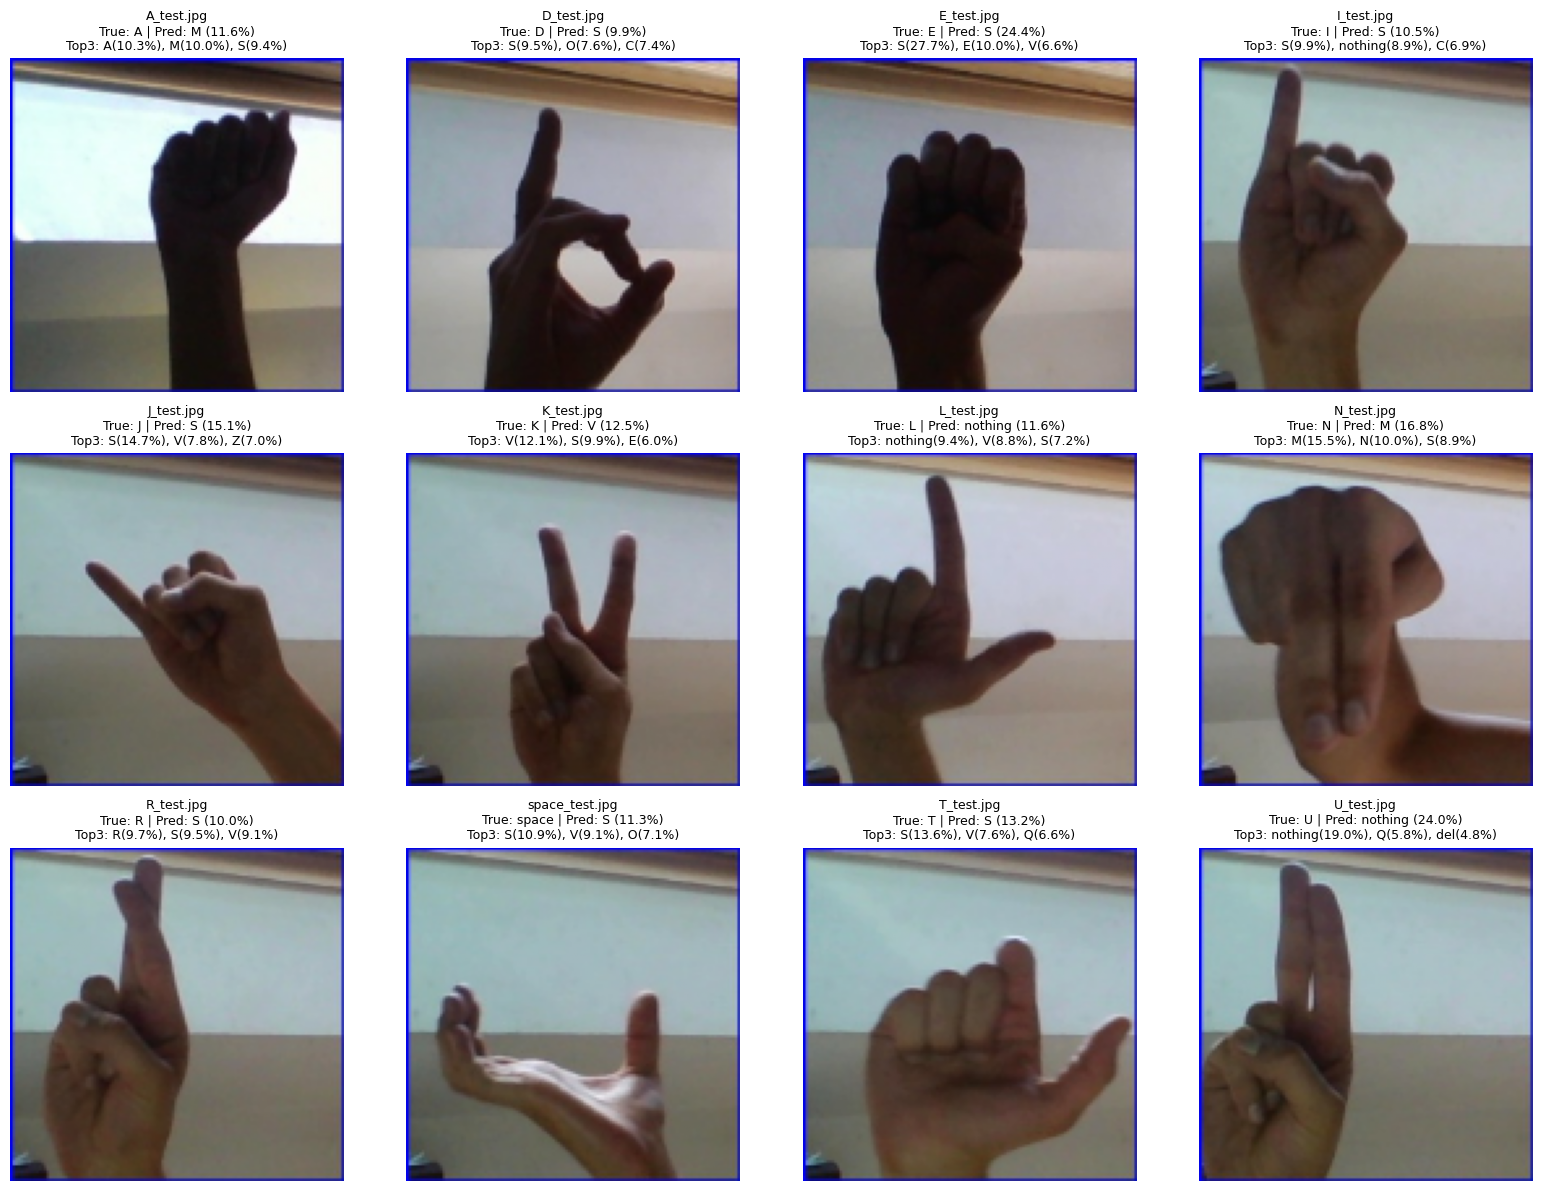


Use these visual cues to inspect why predictions failed (background, lighting, shape).


In [47]:
# ============================================
# VISUALIZE MISCLASSIFIED TEST IMAGES
# ============================================
import math
from collections import Counter
import matplotlib.pyplot as plt

print("=" * 70)
print("VISUALIZING MISCLASSIFICATIONS")
print("=" * 70)

# Ensure predictions are available
required_vars = [
    'test_images', 'image_names', 'true_labels', 'predicted_classes',
    'predicted_confidences', 'top3_indices', 'top3_probs', 'class_labels'
]

missing = [var for var in required_vars if var not in globals()]
if missing:
    print(f"⚠ ERROR: Missing variables: {missing}")
    print("Run the prediction cell (with TTA) before this cell.")
else:
    predicted_labels = [class_labels[idx] for idx in predicted_classes]
    mis_idx = [i for i in range(len(true_labels)) if predicted_labels[i] != true_labels[i]]
    
    print(f"Total test images: {len(true_labels)}")
    print(f"Misclassified images: {len(mis_idx)}")
    print(f"Accuracy: {(len(true_labels) - len(mis_idx)) / len(true_labels) * 100:.2f}%")
    
    if not mis_idx:
        print("🎉 No misclassifications to display!")
    else:
        # Show summary of common confusions
        confusions = Counter(
            [(true_labels[i], predicted_labels[i]) for i in mis_idx]
        )
        print("\nMost common confusions (True → Predicted):")
        for (true_label, pred_label), count in confusions.most_common(5):
            print(f"  {true_label} → {pred_label}: {count} time(s)")
        
        # Plot misclassified images
        max_images = min(12, len(mis_idx))
        cols = 4
        rows = math.ceil(max_images / cols)
        plt.figure(figsize=(cols * 4, rows * 4))
        
        for idx, mis in enumerate(mis_idx[:max_images]):
            plt.subplot(rows, cols, idx + 1)
            plt.imshow(test_images[mis])
            plt.axis('off')
            pred = predicted_labels[mis]
            true = true_labels[mis]
            conf = predicted_confidences[mis] * 100
            top3 = ", ".join([
                f"{class_labels[top3_indices[mis][j]]}({top3_probs[mis][j] * 100:.1f}%)"
                for j in range(3)
            ])
            plt.title(
                f"{image_names[mis]}\nTrue: {true} | Pred: {pred} ({conf:.1f}%)\nTop3: {top3}",
                fontsize=9
            )
        
        plt.tight_layout()
        plt.show()
        
        print("\nUse these visual cues to inspect why predictions failed (background, lighting, shape).")


In [ ]:
# ============================================
# IMPROVED TEST PREDICTIONS WITH TEST-TIME AUGMENTATION (TTA)
# ============================================
import numpy as np
import cv2
from scipy import ndimage

print("=" * 70)
print("IMPROVED TEST PREDICTIONS WITH TTA")
print("=" * 70)

# Verify model is loaded
try:
    _ = model.input_shape
    print("✓ Model loaded and ready")
except:
    print("⚠ ERROR: Model not loaded! Run Cell 12 first.")
    raise

# Verify test images are loaded
try:
    _ = test_images.shape
    print(f"✓ Test images loaded: {len(test_images)} images")
except:
    print("⚠ ERROR: test_images not found! Load test images first.")
    raise

print(f"\n📊 Preprocessing Verification:")
print(f"  - Test image shape: {test_images[0].shape}")
print(f"  - Model expected: {model.input_shape}")
print(f"  - Pixel range: [{test_images.min():.3f}, {test_images.max():.3f}]")

# Ensure images are correctly preprocessed
if test_images.max() > 1.0:
    print("⚠ WARNING: Images not normalized! Normalizing now...")
    test_images = test_images / 255.0

if test_images.shape[1:3] != (128, 128):
    print("⚠ WARNING: Images not 128x128! Resizing now...")
    resized = []
    for img in test_images:
        resized.append(cv2.resize(img, (128, 128)))
    test_images = np.array(resized)

print("✓ Preprocessing verified")

# Test-Time Augmentation (TTA) - creates multiple augmented versions
def create_tta_images(image):
    """Create test-time augmented versions of an image"""
    tta_images = [image]  # Original
    
    # Slight rotation
    tta_images.append(ndimage.rotate(image, 5, reshape=False, mode='nearest'))
    tta_images.append(ndimage.rotate(image, -5, reshape=False, mode='nearest'))
    
    # Slight brightness adjustment
    tta_images.append(np.clip(image * 1.1, 0, 1))
    tta_images.append(np.clip(image * 0.9, 0, 1))
    
    return np.array(tta_images)

print(f"\n🔄 Creating Test-Time Augmentations...")
print(f"  - Original images: {len(test_images)}")
print(f"  - Augmentations per image: 5 (original + 4 variants)")
print(f"  - Total predictions: {len(test_images) * 5}")

# Get predictions with TTA
all_predictions = []

for i, img in enumerate(test_images):
    if i % 5 == 0:
        print(f"  Processing image {i+1}/{len(test_images)}...", end='\r')
    
    # Create augmented versions
    tta_imgs = create_tta_images(img)
    
    # Get predictions for all augmented versions
    tta_preds = model.predict(tta_imgs, verbose=0, batch_size=5)
    
    # Average predictions (ensemble)
    avg_pred = np.mean(tta_preds, axis=0)
    all_predictions.append(avg_pred)

all_predictions = np.array(all_predictions)
print(f"\n✓ TTA predictions completed")

# Convert to class labels
predicted_classes = np.argmax(all_predictions, axis=1)
predicted_confidences = np.max(all_predictions, axis=1)

# Get top 3 predictions for each image
top3_indices = np.argsort(all_predictions, axis=1)[:, -3:][:, ::-1]
top3_probs = np.sort(all_predictions, axis=1)[:, -3:][:, ::-1]

# Extract true labels
true_labels = [img_name.split("_")[0] for img_name in image_names]

# Calculate accuracy
correct = sum([1 if class_labels[predicted_classes[i]] == true_labels[i] else 0 
               for i in range(len(true_labels))])
accuracy = correct / len(true_labels) * 100

print("\n" + "=" * 70)
print("IMPROVED PREDICTION RESULTS (WITH TTA)")
print("=" * 70)

# Display results
for i, img_name in enumerate(image_names):
    pred_label = class_labels[predicted_classes[i]]
    true_label = true_labels[i]
    confidence = predicted_confidences[i] * 100
    
    status = "✓" if pred_label == true_label else "✗"
    print(f"{status} {img_name:20s} → Predicted: {pred_label:8s} (True: {true_label:8s}) | Confidence: {confidence:5.1f}%")
    
    if pred_label != true_label:
        top3_str = ", ".join([f"{class_labels[top3_indices[i][j]]}({top3_probs[i][j]*100:.1f}%)" 
                             for j in range(3)])
        print(f"    Top 3: {top3_str}")

print("\n" + "=" * 70)
print("SUMMARY:")
print("=" * 70)
print(f"  Correct: {correct}/{len(true_labels)}")
print(f"  Accuracy: {accuracy:.2f}%")
print(f"  Average Confidence: {predicted_confidences.mean()*100:.1f}%")
print(f"  Improvement: Using TTA for more robust predictions")
print("=" * 70)

print("\n✓ Improved predictions completed!")


IMPROVED TEST PREDICTIONS WITH TTA
✓ Model loaded and ready
✓ Test images loaded: 28 images

📊 Preprocessing Verification:
  - Test image shape: (128, 128, 3)
  - Model expected: (None, 128, 128, 3)
  - Pixel range: [0.000, 1.000]
✓ Preprocessing verified

🔄 Creating Test-Time Augmentations...
  - Original images: 28
  - Augmentations per image: 5 (original + 4 variants)
  - Total predictions: 140
  Processing image 26/28...
✓ TTA predictions completed

IMPROVED PREDICTION RESULTS (WITH TTA)
✓ A_test.jpg           → Predicted: A        (True: A       ) | Confidence:  10.3%
✓ B_test.jpg           → Predicted: B        (True: B       ) | Confidence:  13.0%
✓ C_test.jpg           → Predicted: C        (True: C       ) | Confidence:  37.9%
✗ D_test.jpg           → Predicted: S        (True: D       ) | Confidence:   9.5%
    Top 3: S(9.5%), O(7.6%), C(7.4%)
✗ E_test.jpg           → Predicted: S        (True: E       ) | Confidence:  27.7%
    Top 3: S(27.7%), E(10.0%), V(6.6%)
✓ F_test.jpg

In [50]:
true_labels = [img_name.split("_")[0] for img_name in image_names]

correct = sum([1 if class_labels[predicted_classes[i]] == true_labels[i] else 0 for i in range(len(true_labels))])
accuracy = correct / len(true_labels) * 100

print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 46.43%


In [49]:
history_dict = history.history

# Plot Accuracy Graph
plt.figure(figsize=(10, 5))
plt.plot(history_dict["accuracy"], label="Training Accuracy", marker="o", color="orange")
plt.plot(history_dict["val_accuracy"], label="Validation Accuracy", marker="o", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss Graph
plt.figure(figsize=(10, 5))
plt.plot(history_dict["loss"], label="Training Loss", marker="o", color="red")
plt.plot(history_dict["val_loss"], label="Validation Loss", marker="o", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'history' is not defined